In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel("premiums_rest.xlsx")
df.head()

Age  Gender     Region Marital_status Physical_Activity Stress_Level  \
0   56  Female  Southeast      Unmarried            Medium       Medium   
1   38  Female  Northeast        Married               Low         High   
2   55    Male  Northeast        Married              High       Medium   
3   33  Female  Northwest      Unmarried               Low         High   
4   53  Female  Northwest      Unmarried            Medium       Medium   

   Number Of Dependants BMI_Category Smoking_Status Employment_Status  \
0                     2       Normal     No Smoking     Self-Employed   
1                     5   Overweight     Occasional        Freelancer   
2                     3   Overweight     Occasional          Salaried   
3                     0       Normal        Regular        Freelancer   
4                     0   Overweight     No Smoking     Self-Employed   

  Income_Level  Income_Lakhs      Medical History Insurance_Plan  \
0    25L - 40L            37  High blood pressure           Gold   
1    10L - 25L            10           No Disease         Silver   
2         <10L             9              Thyroid         Silver   
3         <10L             1           No Disease           Gold   
4         <10L             6           No Disease         Silver   

   Annual_Premium_Amount  
0                  27944  
1                  21108  
2                  21685  
3                  28388  
4                  20959

In [3]:
df['Genetical_Risk']=0

In [4]:
df.shape

(7059, 16)

In [5]:
# modifying the columns name
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
df.head(1)

age  gender     region marital_status physical_activity stress_level  \
0   56  Female  Southeast      Unmarried            Medium       Medium   

   number_of_dependants bmi_category smoking_status employment_status  \
0                     2       Normal     No Smoking     Self-Employed   

  income_level  income_lakhs      medical_history insurance_plan  \
0    25L - 40L            37  High blood pressure           Gold   

   annual_premium_amount  genetical_risk  
0                  27944               0

In [7]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
physical_activity         0
stress_level              0
number_of_dependants      0
bmi_category              0
smoking_status            6
employment_status         6
income_level             15
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
genetical_risk            0
dtype: int64

# Handle NAN Values

In [8]:
df["smoking_status"].value_counts()

smoking_status
No Smoking    3586
Regular       2208
Occasional    1259
Name: count, dtype: int64

In [9]:
df["income_level"].value_counts()

income_level
<10L         2732
10L - 25L    1958
25L - 40L    1422
> 40L         932
Name: count, dtype: int64

In [10]:
df["smoking_status"]  = df["smoking_status"].fillna(df["smoking_status"].mode()[0] )
df["income_level"]  = df["income_level"].fillna(df["income_level"].mode()[0] )
df["employment_status"]  = df["employment_status"].fillna(df["employment_status"].mode()[0] )


In [11]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

age  number_of_dependants  income_lakhs  annual_premium_amount  \
count  7059.000000           7059.000000   7059.000000            7059.000000   
mean     49.573311              3.542145     23.024366           23603.105397   
std      67.283394             20.408440     29.341744            7095.778066   
min      26.000000              0.000000      1.000000            4994.000000   
25%      36.000000              2.000000      6.000000           18248.500000   
50%      45.000000              3.000000     16.000000           23280.000000   
75%      54.000000              3.000000     31.000000           29183.000000   
max    1178.000000            456.000000    950.000000           45854.000000   

       genetical_risk  
count          7059.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

In [14]:
df['number_of_dependants'].value_counts()

number_of_dependants
3      2230
2      1589
4      1100
0      1053
1       642
5       416
456      12
78        9
230       8
Name: count, dtype: int64

In [15]:
numeric_columns = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

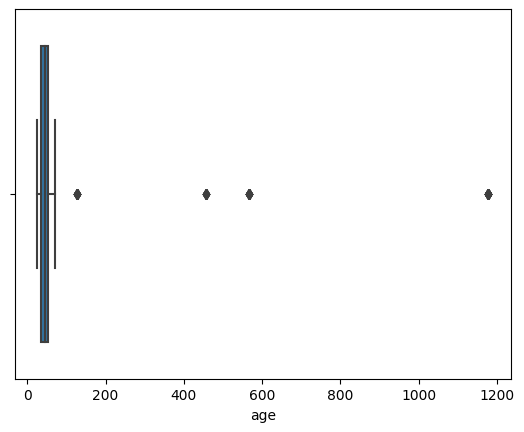

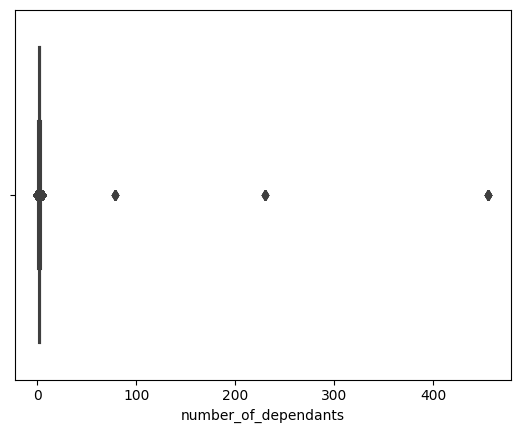

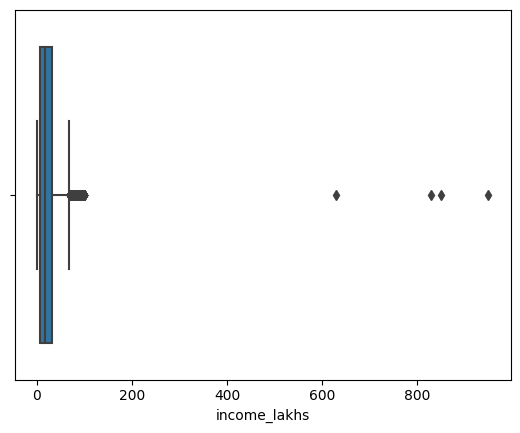

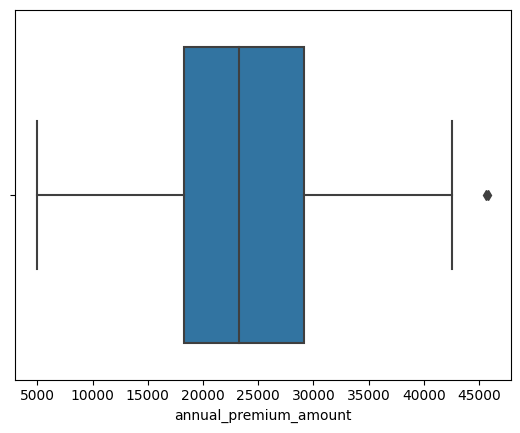

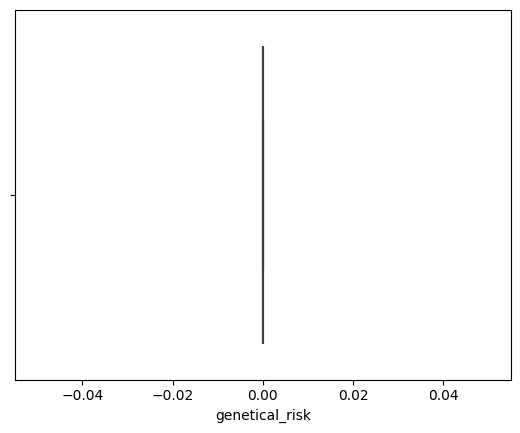

In [16]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [17]:
df[df.age>100]['age'].unique()

array([ 128, 1178,  567,  456], dtype=int64)

In [18]:
df1 = df[df.age<=100].copy()
df1.describe()

age  number_of_dependants  income_lakhs  annual_premium_amount  \
count  7001.000000           7001.000000   7001.000000            7001.000000   
mean     44.577632              3.556063     23.047707           23627.009570   
std      10.850504             20.491776     29.414977            7076.678063   
min      26.000000              0.000000      1.000000            6872.000000   
25%      35.000000              2.000000      6.000000           18289.000000   
50%      45.000000              3.000000     16.000000           23300.000000   
75%      53.000000              3.000000     31.000000           29189.000000   
max      72.000000            456.000000    950.000000           45854.000000   

       genetical_risk  
count          7001.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

In [19]:
df1.describe()

age  number_of_dependants  income_lakhs  annual_premium_amount  \
count  7001.000000           7001.000000   7001.000000            7001.000000   
mean     44.577632              3.556063     23.047707           23627.009570   
std      10.850504             20.491776     29.414977            7076.678063   
min      26.000000              0.000000      1.000000            6872.000000   
25%      35.000000              2.000000      6.000000           18289.000000   
50%      45.000000              3.000000     16.000000           23300.000000   
75%      53.000000              3.000000     31.000000           29189.000000   
max      72.000000            456.000000    950.000000           45854.000000   

       genetical_risk  
count          7001.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

<Axes: xlabel='income_lakhs', ylabel='Count'>

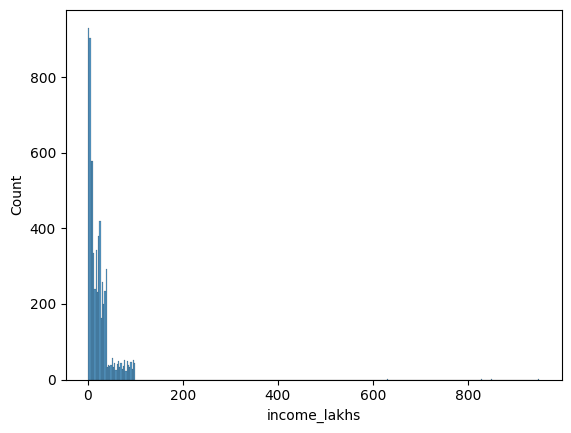

In [20]:
sns.histplot(df1['income_lakhs'])

In [21]:
High = df1.income_lakhs.quantile(0.998)
High

100.0

In [22]:
df2 = df1[df1.income_lakhs<=High].copy()

In [23]:
df2.shape

(6997, 16)

In [24]:
df2.describe()

age  number_of_dependants  income_lakhs  annual_premium_amount  \
count  6997.000000           6997.000000   6997.000000            6997.000000   
mean     44.578962              3.556810     22.594969           23626.412748   
std      10.851205             20.497565     22.343408            7074.559917   
min      26.000000              0.000000      1.000000            6872.000000   
25%      35.000000              2.000000      6.000000           18289.000000   
50%      45.000000              3.000000     16.000000           23299.000000   
75%      53.000000              3.000000     31.000000           29189.000000   
max      72.000000            456.000000    100.000000           45854.000000   

       genetical_risk  
count          6997.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

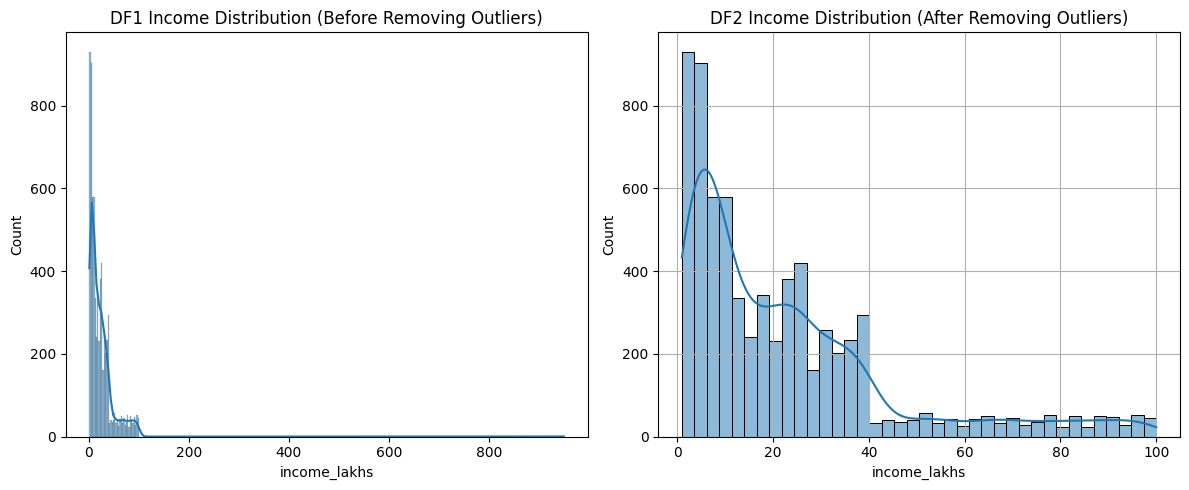

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histograms on each subplot
sns.histplot(df1['income_lakhs'], ax=axes[0], kde=True)
axes[0].set_title('DF1 Income Distribution (Before Removing Outliers)')

sns.histplot(df2['income_lakhs'], ax=axes[1], kde=True)
axes[1].set_title('DF2 Income Distribution (After Removing Outliers)')

# Adjust layout to avoid overlap
plt.grid()
plt.tight_layout()
plt.show()


<Axes: xlabel='number_of_dependants'>

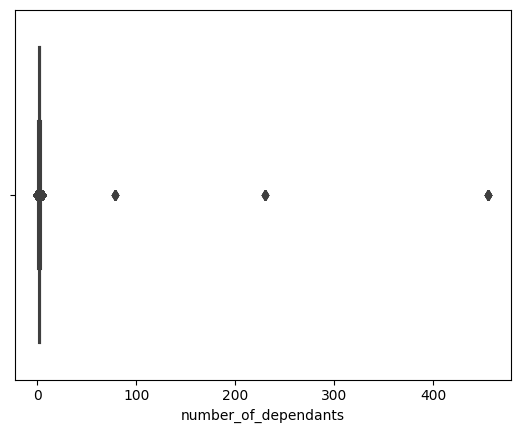

In [26]:
sns.boxplot(x = df1.number_of_dependants)

In [27]:
df2.number_of_dependants.value_counts()

number_of_dependants
3      2215
2      1579
4      1095
0      1037
1       630
5       412
456      12
78        9
230       8
Name: count, dtype: int64

In [28]:
high_dependants = df2.number_of_dependants.quantile(0.99)
high_dependants

5.0

In [29]:
df3 = df2[df2.number_of_dependants <= high_dependants].copy()
df3.shape

(6968, 16)

In [30]:
df2['number_of_dependants'] = df2['number_of_dependants'].apply(lambda x : 5 if x > 5 else x)

In [31]:
df2.describe()

age  number_of_dependants  income_lakhs  annual_premium_amount  \
count  6997.000000           6997.000000   6997.000000            6997.000000   
mean     44.578962              2.432185     22.594969           23626.412748   
std      10.851205              1.416389     22.343408            7074.559917   
min      26.000000              0.000000      1.000000            6872.000000   
25%      35.000000              2.000000      6.000000           18289.000000   
50%      45.000000              3.000000     16.000000           23299.000000   
75%      53.000000              3.000000     31.000000           29189.000000   
max      72.000000              5.000000    100.000000           45854.000000   

       genetical_risk  
count          6997.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

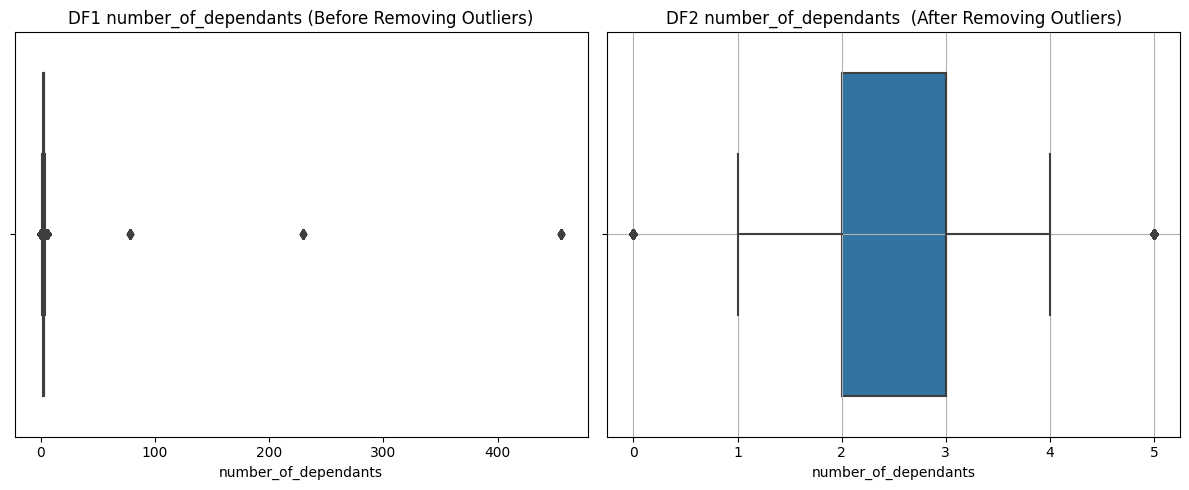

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histograms on each subplot
sns.boxplot(x=df1['number_of_dependants'], ax=axes[0])
axes[0].set_title('DF1 number_of_dependants (Before Removing Outliers)')

sns.boxplot(x=df2['number_of_dependants'], ax=axes[1])
axes[1].set_title('DF2 number_of_dependants  (After Removing Outliers)')

# Adjust layout to avoid overlap
plt.grid()
plt.tight_layout()
plt.show()

<Axes: xlabel='income_lakhs', ylabel='Count'>

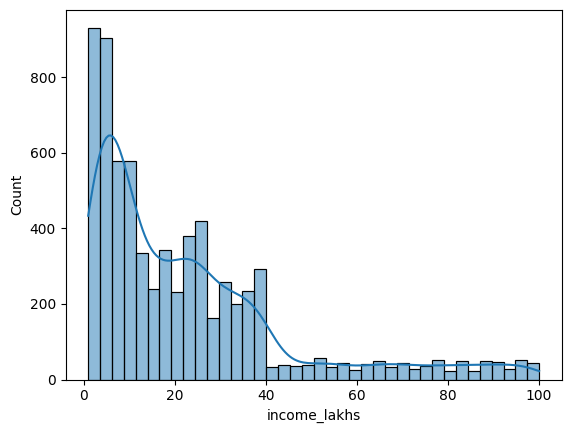

In [33]:
sns.histplot(x=df2.income_lakhs, kde=True)

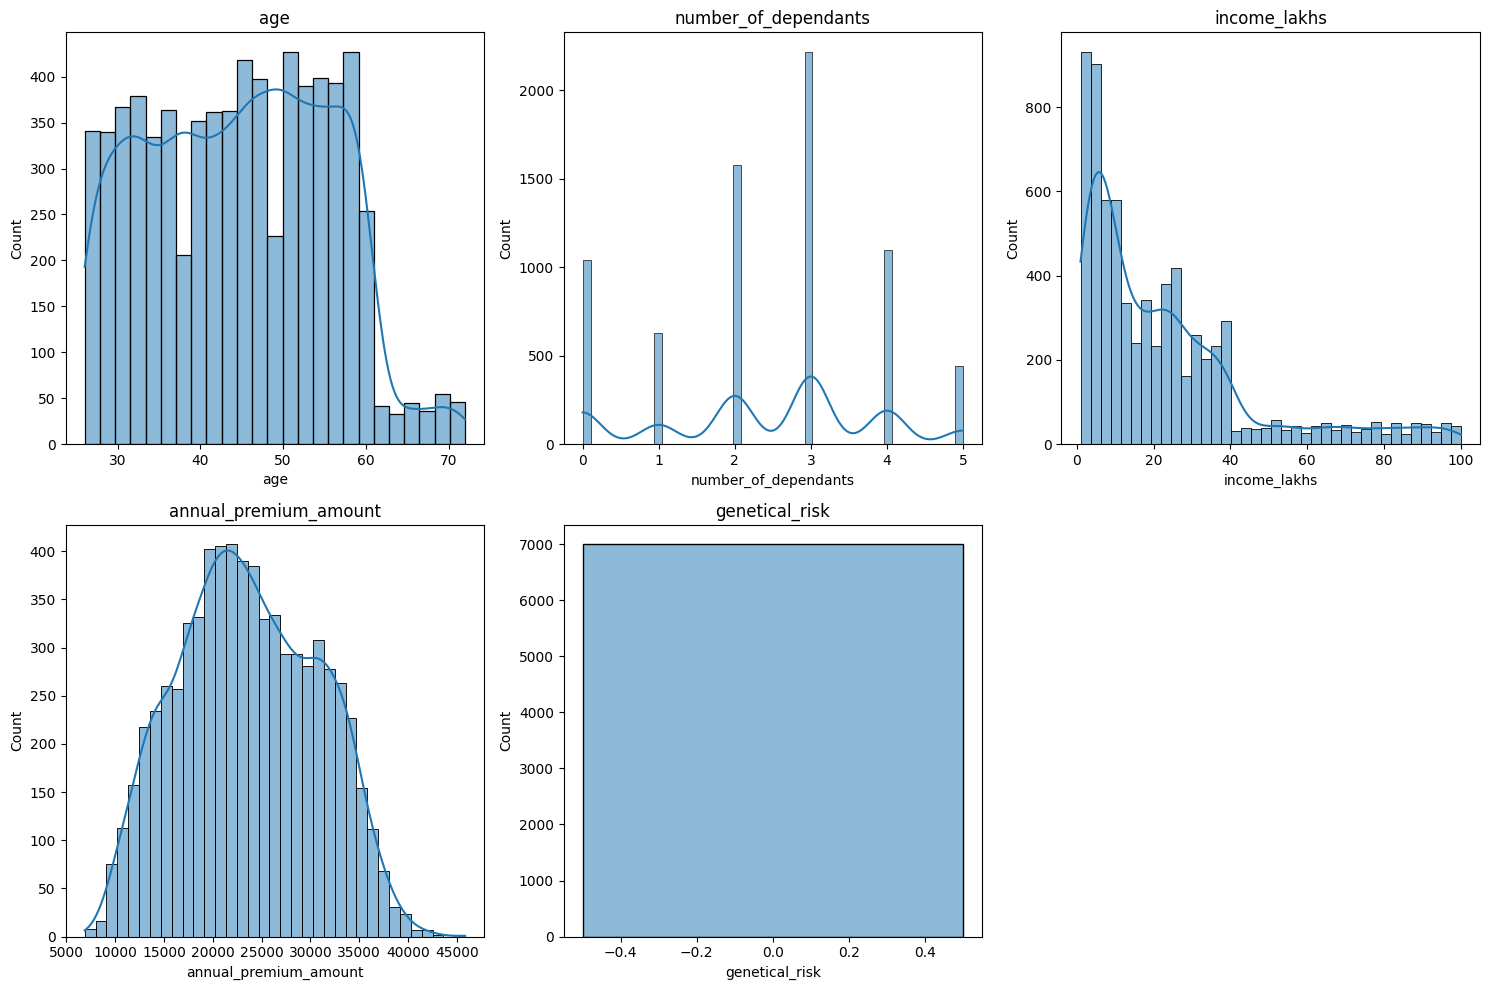

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the size to ensure proper display

# Iterate over enumerated numeric columns to plot histograms
for i, column in enumerate(numeric_columns):
    # Locate the correct subplot using integer division and modulus
    ax = axs[i // 3, i % 3]  # Row index is i//3, column index is i%3
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

# If the last subplot axis is unused, you can turn it off
if len(numeric_columns) % 3 != 0:
    for j in range(len(numeric_columns), 6):  # This will disable any unused subplots
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In [35]:
import plotly.express as px

# Assuming your DataFrame is named df2 and you have 'age' and 'annual_premium_amount' columns
fig = px.scatter(df2, x='age', y='annual_premium_amount', 
                 title='Scatterplot of Age vs Annual Premium Amount',
                 labels={'age': 'Age', 'annual_premium_amount': 'Annual Premium Amount'},
                 trendline="ols")  # Optionally, you can add a trendline

# Show the plot
fig.show()



In [36]:
# Assuming your DataFrame is named df2 and you have 'age' and 'annual_premium_amount' columns
fig = px.scatter(df2, x='annual_premium_amount', y='number_of_dependants', 
                 title='Scatterplot of Age vs Annual Premium Amount',
                 labels={'age': 'Age', 'annual_premium_amount': 'Annual Premium Amount'},
                 trendline="ols")  # Optionally, you can add a trendline

# Show the plot
fig.show()


In [37]:
# List of categorical variables
categorical_columns = ['gender', 'region', 'marital_status', 'physical_activity',
                       'stress_level', 'bmi_category', 'smoking_status',
                       'employment_status', 'income_level', 'medical_history', 
                       'insurance_plan']

for col in categorical_columns:
    print(col, " : " ,df2[col].unique())

gender  :  ['Female' 'Male']
region  :  ['Southeast' 'Northeast' 'Northwest' 'Southwest']
marital_status  :  ['Unmarried' 'Married']
physical_activity  :  ['Medium' 'Low' 'High']
stress_level  :  ['Medium' 'High' 'Low']
bmi_category  :  ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status  :  ['No Smoking' 'Occasional' 'Regular']
employment_status  :  ['Self-Employed' 'Freelancer' 'Salaried']
income_level  :  ['25L - 40L' '10L - 25L' '<10L' '> 40L']
medical_history  :  ['High blood pressure' 'No Disease' 'Thyroid' 'Diabetes & Thyroid'
 'Diabetes' 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'High blood pressure & Heart disease']
insurance_plan  :  ['Gold' 'Silver' 'Bronze']


In [38]:
gender_counts = df2['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Create a pie chart using Plotly
fig = px.pie(gender_counts, names='gender', values='count',
             title='Distribution of Gender Categories')

# Show the plot
fig.show()

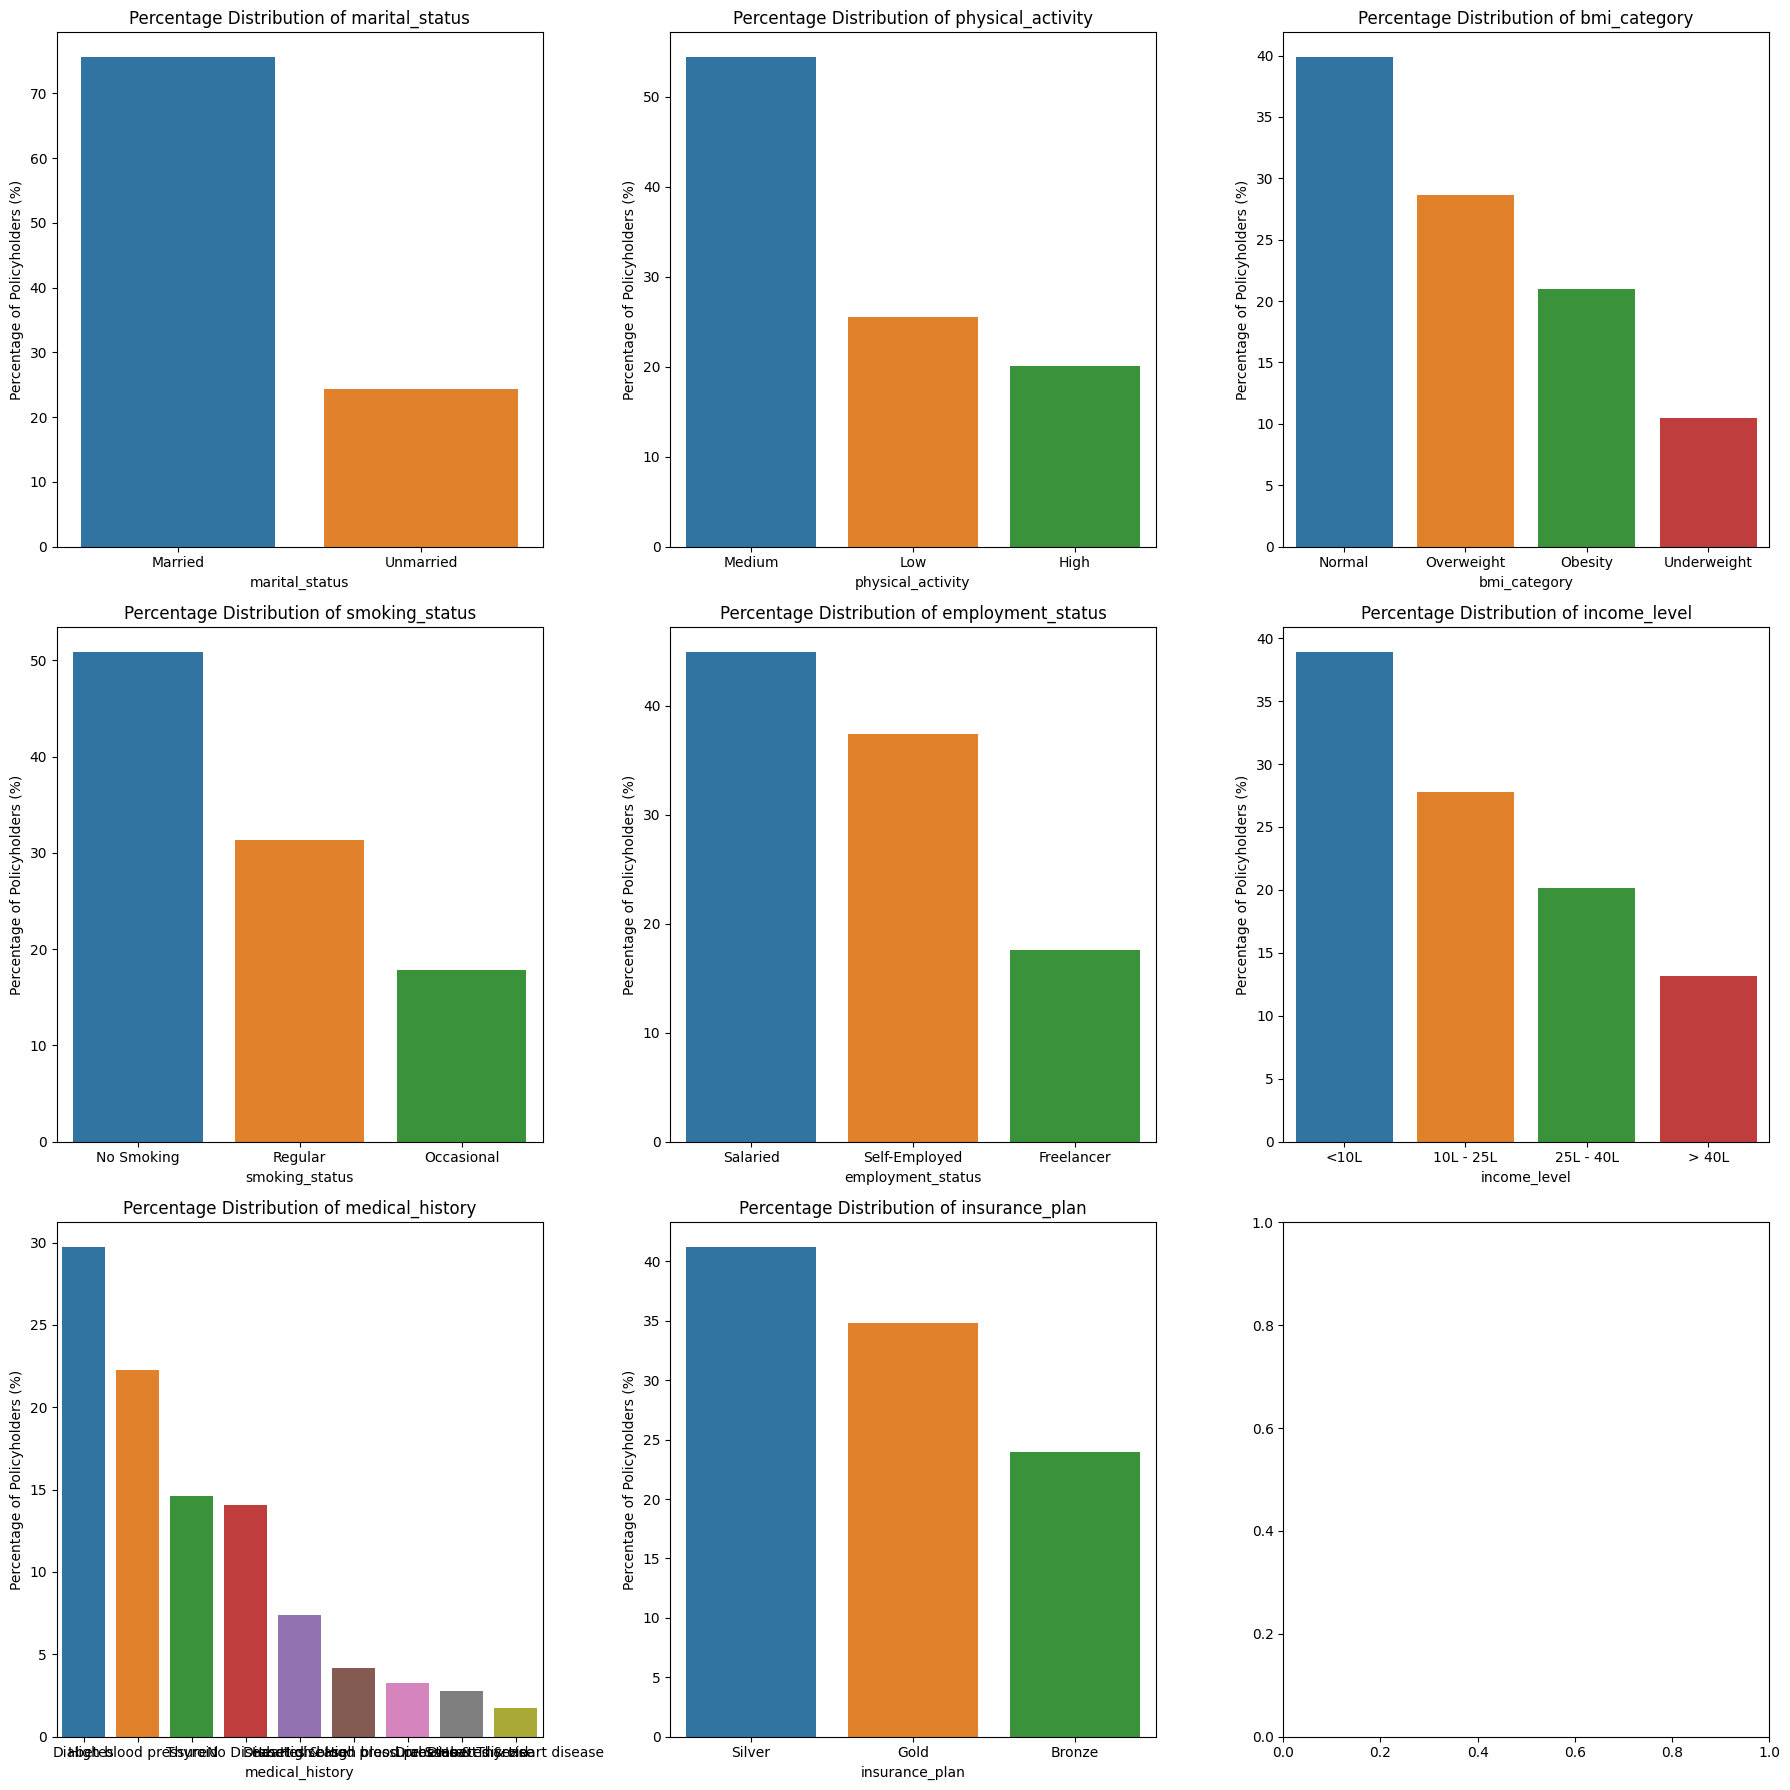

In [39]:
# Assuming 'categorical_cols' is a list of categorical columns
categorical_cols = ['marital_status', 'physical_activity', 'bmi_category', 'smoking_status',
                     'employment_status', 'income_level', 'medical_history', 'insurance_plan']  # Replace with actual columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Loop through each subplot and corresponding categorical column
for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    
    # Set titles and labels for the subplot
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

# Adjusts plot parameters for a better fit in the figure window
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          183   879     881
25L - 40L           63   707     639
<10L              1383   120    1220
> 40L               46   731     145

Text(0.5, 1.0, 'Income vs Plan')

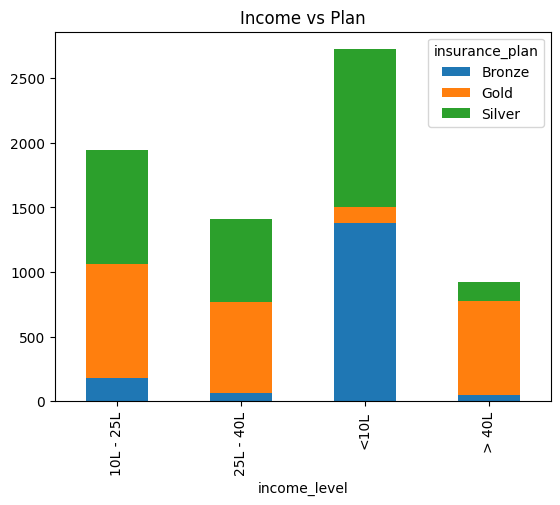

In [41]:
crosstab.plot(kind="bar", stacked=True)
plt.title("Income vs Plan")

<Axes: xlabel='insurance_plan', ylabel='income_level'>

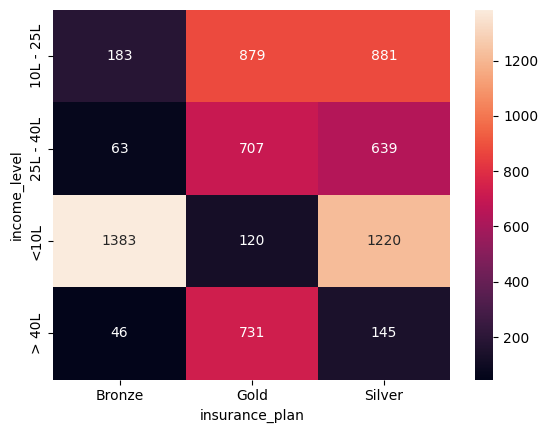

In [42]:
sns.heatmap(crosstab, annot=True, fmt = "d")

In [43]:
df.head(2)

age  gender     region marital_status physical_activity stress_level  \
0   56  Female  Southeast      Unmarried            Medium       Medium   
1   38  Female  Northeast        Married               Low         High   

   number_of_dependants bmi_category smoking_status employment_status  \
0                     2       Normal     No Smoking     Self-Employed   
1                     5   Overweight     Occasional        Freelancer   

  income_level  income_lakhs      medical_history insurance_plan  \
0    25L - 40L            37  High blood pressure           Gold   
1    10L - 25L            10           No Disease         Silver   

   annual_premium_amount  genetical_risk  
0                  27944               0  
1                  21108               0

In [44]:
df.medical_history.unique()

array(['High blood pressure', 'No Disease', 'Thyroid',
       'Diabetes & Thyroid', 'Diabetes', 'Heart disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'High blood pressure & Heart disease'], dtype=object)

In [45]:
# Mapping of diseases to risk scores
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

# Split medical_history into two separate disease columns and convert to lowercase
df2[["disease_1", "disease_2"]] = df2['medical_history'].str.split("&", expand=True).apply(lambda x: x.str.strip().str.lower())

# Fill missing values in disease columns with 'none'
df2["disease_1"].fillna('none', inplace=True)
df2["disease_2"].fillna('none', inplace=True)

# Calculate total risk score by summing risk scores for both diseases
df2['total_risk_score'] = df2['disease_1'].map(risk_scores) + df2['disease_2'].map(risk_scores)

# Normalize the total risk score between 0 and 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()

df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)

# Display the first 10 rows of the dataframe
df2.head(10)


age  gender     region marital_status physical_activity stress_level  \
0   56  Female  Southeast      Unmarried            Medium       Medium   
1   38  Female  Northeast        Married               Low         High   
2   55    Male  Northeast        Married              High       Medium   
3   33  Female  Northwest      Unmarried               Low         High   
4   53  Female  Northwest      Unmarried            Medium       Medium   
5   39  Female  Northwest        Married              High       Medium   
6   42  Female  Southeast      Unmarried               Low       Medium   
7   42  Female  Northwest        Married            Medium       Medium   
8   44    Male  Northwest        Married            Medium       Medium   
9   55  Female  Southeast        Married            Medium         High   

   number_of_dependants bmi_category smoking_status employment_status  \
0                     2       Normal     No Smoking     Self-Employed   
1                     5   Overweight     Occasional        Freelancer   
2                     3   Overweight     Occasional          Salaried   
3                     0       Normal        Regular        Freelancer   
4                     0   Overweight     No Smoking     Self-Employed   
5                     3      Obesity     No Smoking          Salaried   
6                     1       Normal     Occasional     Self-Employed   
7                     4       Normal     Occasional     Self-Employed   
8                     2   Overweight        Regular          Salaried   
9                     3       Normal     Occasional          Salaried   

  income_level  income_lakhs      medical_history insurance_plan  \
0    25L - 40L            37  High blood pressure           Gold   
1    10L - 25L            10           No Disease         Silver   
2         <10L             9              Thyroid         Silver   
3         <10L             1           No Disease           Gold   
4         <10L             6           No Disease         Silver   
5    10L - 25L            21   Diabetes & Thyroid         Silver   
6         <10L             6              Thyroid         Silver   
7    10L - 25L            18             Diabetes         Silver   
8    25L - 40L            38  High blood pressure         Silver   
9         <10L             8           No Disease           Gold   

   annual_premium_amount  genetical_risk            disease_1 disease_2  \
0                  27944               0  high blood pressure      none   
1                  21108               0           no disease      none   
2                  21685               0              thyroid      none   
3                  28388               0           no disease      none   
4                  20959               0           no disease      none   
5                  22640               0             diabetes   thyroid   
6                  19319               0              thyroid      none   
7                  19150               0             diabetes      none   
8                  22559               0  high blood pressure      none   
9                  28166               0           no disease      none   

   total_risk_score  normalized_risk_score  
0                 6               0.428571  
1                 0               0.000000  
2                 5               0.357143  
3                 0               0.000000  
4                 0               0.000000  
5                11               0.785714  
6                 5               0.357143  
7                 6               0.428571  
8                 6               0.428571  
9                 0               0.000000

In [46]:
df2['insurance_plan'].value_counts()

insurance_plan
Silver    2885
Gold      2437
Bronze    1675
Name: count, dtype: int64

In [47]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2['stress_level'] = df2['stress_level'].map({'Low':1, 'Medium':2, 'High':3})

In [48]:
df2.head(5)

age  gender     region marital_status physical_activity  stress_level  \
0   56  Female  Southeast      Unmarried            Medium             2   
1   38  Female  Northeast        Married               Low             3   
2   55    Male  Northeast        Married              High             2   
3   33  Female  Northwest      Unmarried               Low             3   
4   53  Female  Northwest      Unmarried            Medium             2   

   number_of_dependants bmi_category smoking_status employment_status  \
0                     2       Normal     No Smoking     Self-Employed   
1                     5   Overweight     Occasional        Freelancer   
2                     3   Overweight     Occasional          Salaried   
3                     0       Normal        Regular        Freelancer   
4                     0   Overweight     No Smoking     Self-Employed   

  income_level  income_lakhs      medical_history  insurance_plan  \
0    25L - 40L            37  High blood pressure               3   
1    10L - 25L            10           No Disease               2   
2         <10L             9              Thyroid               2   
3         <10L             1           No Disease               3   
4         <10L             6           No Disease               2   

   annual_premium_amount  genetical_risk            disease_1 disease_2  \
0                  27944               0  high blood pressure      none   
1                  21108               0           no disease      none   
2                  21685               0              thyroid      none   
3                  28388               0           no disease      none   
4                  20959               0           no disease      none   

   total_risk_score  normalized_risk_score  
0                 6               0.428571  
1                 0               0.000000  
2                 5               0.357143  
3                 0               0.000000  
4                 0               0.000000

In [49]:
df2['income_level'].value_counts()

income_level
<10L         2723
10L - 25L    1943
25L - 40L    1409
> 40L         922
Name: count, dtype: int64

In [50]:
df2['income_level'] = df2['income_level'].map({'<10L':1,'10L - 25L':2, '25L - 40L':3, '> 40L':4})

In [51]:
df2.head(4)

age  gender     region marital_status physical_activity  stress_level  \
0   56  Female  Southeast      Unmarried            Medium             2   
1   38  Female  Northeast        Married               Low             3   
2   55    Male  Northeast        Married              High             2   
3   33  Female  Northwest      Unmarried               Low             3   

   number_of_dependants bmi_category smoking_status employment_status  \
0                     2       Normal     No Smoking     Self-Employed   
1                     5   Overweight     Occasional        Freelancer   
2                     3   Overweight     Occasional          Salaried   
3                     0       Normal        Regular        Freelancer   

   income_level  income_lakhs      medical_history  insurance_plan  \
0             3            37  High blood pressure               3   
1             2            10           No Disease               2   
2             1             9              Thyroid               2   
3             1             1           No Disease               3   

   annual_premium_amount  genetical_risk            disease_1 disease_2  \
0                  27944               0  high blood pressure      none   
1                  21108               0           no disease      none   
2                  21685               0              thyroid      none   
3                  28388               0           no disease      none   

   total_risk_score  normalized_risk_score  
0                 6               0.428571  
1                 0               0.000000  
2                 5               0.357143  
3                 0               0.000000

In [52]:
# List of nominal columns
nominal_columns = ['gender', 'region', 'marital_status', 'physical_activity',
                    'bmi_category', 'smoking_status', 'employment_status']

df3 = pd.get_dummies(df2, columns=nominal_columns, drop_first=True, dtype=int)
df3.head()

age  stress_level  number_of_dependants  income_level  income_lakhs  \
0   56             2                     2             3            37   
1   38             3                     5             2            10   
2   55             2                     3             1             9   
3   33             3                     0             1             1   
4   53             2                     0             1             6   

       medical_history  insurance_plan  annual_premium_amount  genetical_risk  \
0  High blood pressure               3                  27944               0   
1           No Disease               2                  21108               0   
2              Thyroid               2                  21685               0   
3           No Disease               3                  28388               0   
4           No Disease               2                  20959               0   

             disease_1  ... marital_status_Unmarried  physical_activity_Low  \
0  high blood pressure  ...                        1                      0   
1           no disease  ...                        0                      1   
2              thyroid  ...                        0                      0   
3           no disease  ...                        1                      1   
4           no disease  ...                        1                      0   

   physical_activity_Medium  bmi_category_Obesity  bmi_category_Overweight  \
0                         1                     0                        0   
1                         0                     0                        1   
2                         0                     0                        1   
3                         0                     0                        0   
4                         1                     0                        1   

   bmi_category_Underweight  smoking_status_Occasional  \
0                         0                          0   
1                         0                          1   
2                         0                          1   
3                         0                          0   
4                         0                          0   

   smoking_status_Regular  employment_status_Salaried  \
0                       0                           0   
1                       0                           0   
2                       0                           1   
3                       1                           0   
4                       0                           0   

   employment_status_Self-Employed  
0                                1  
1                                0  
2                                0  
3                                0  
4                                1  

[5 rows x 27 columns]

In [53]:
df4 = df3.drop(['medical_history','disease_1','disease_2','total_risk_score'], axis=1)
df4.head(3)

age  stress_level  number_of_dependants  income_level  income_lakhs  \
0   56             2                     2             3            37   
1   38             3                     5             2            10   
2   55             2                     3             1             9   

   insurance_plan  annual_premium_amount  genetical_risk  \
0               3                  27944               0   
1               2                  21108               0   
2               2                  21685               0   

   normalized_risk_score  gender_Male  ...  marital_status_Unmarried  \
0               0.428571            0  ...                         1   
1               0.000000            0  ...                         0   
2               0.357143            1  ...                         0   

   physical_activity_Low  physical_activity_Medium  bmi_category_Obesity  \
0                      0                         1                     0   
1                      1                         0                     0   
2                      0                         0                     0   

   bmi_category_Overweight  bmi_category_Underweight  \
0                        0                         0   
1                        1                         0   
2                        1                         0   

   smoking_status_Occasional  smoking_status_Regular  \
0                          0                       0   
1                          1                       0   
2                          1                       0   

   employment_status_Salaried  employment_status_Self-Employed  
0                           0                                1  
1                           0                                0  
2                           1                                0  

[3 rows x 23 columns]

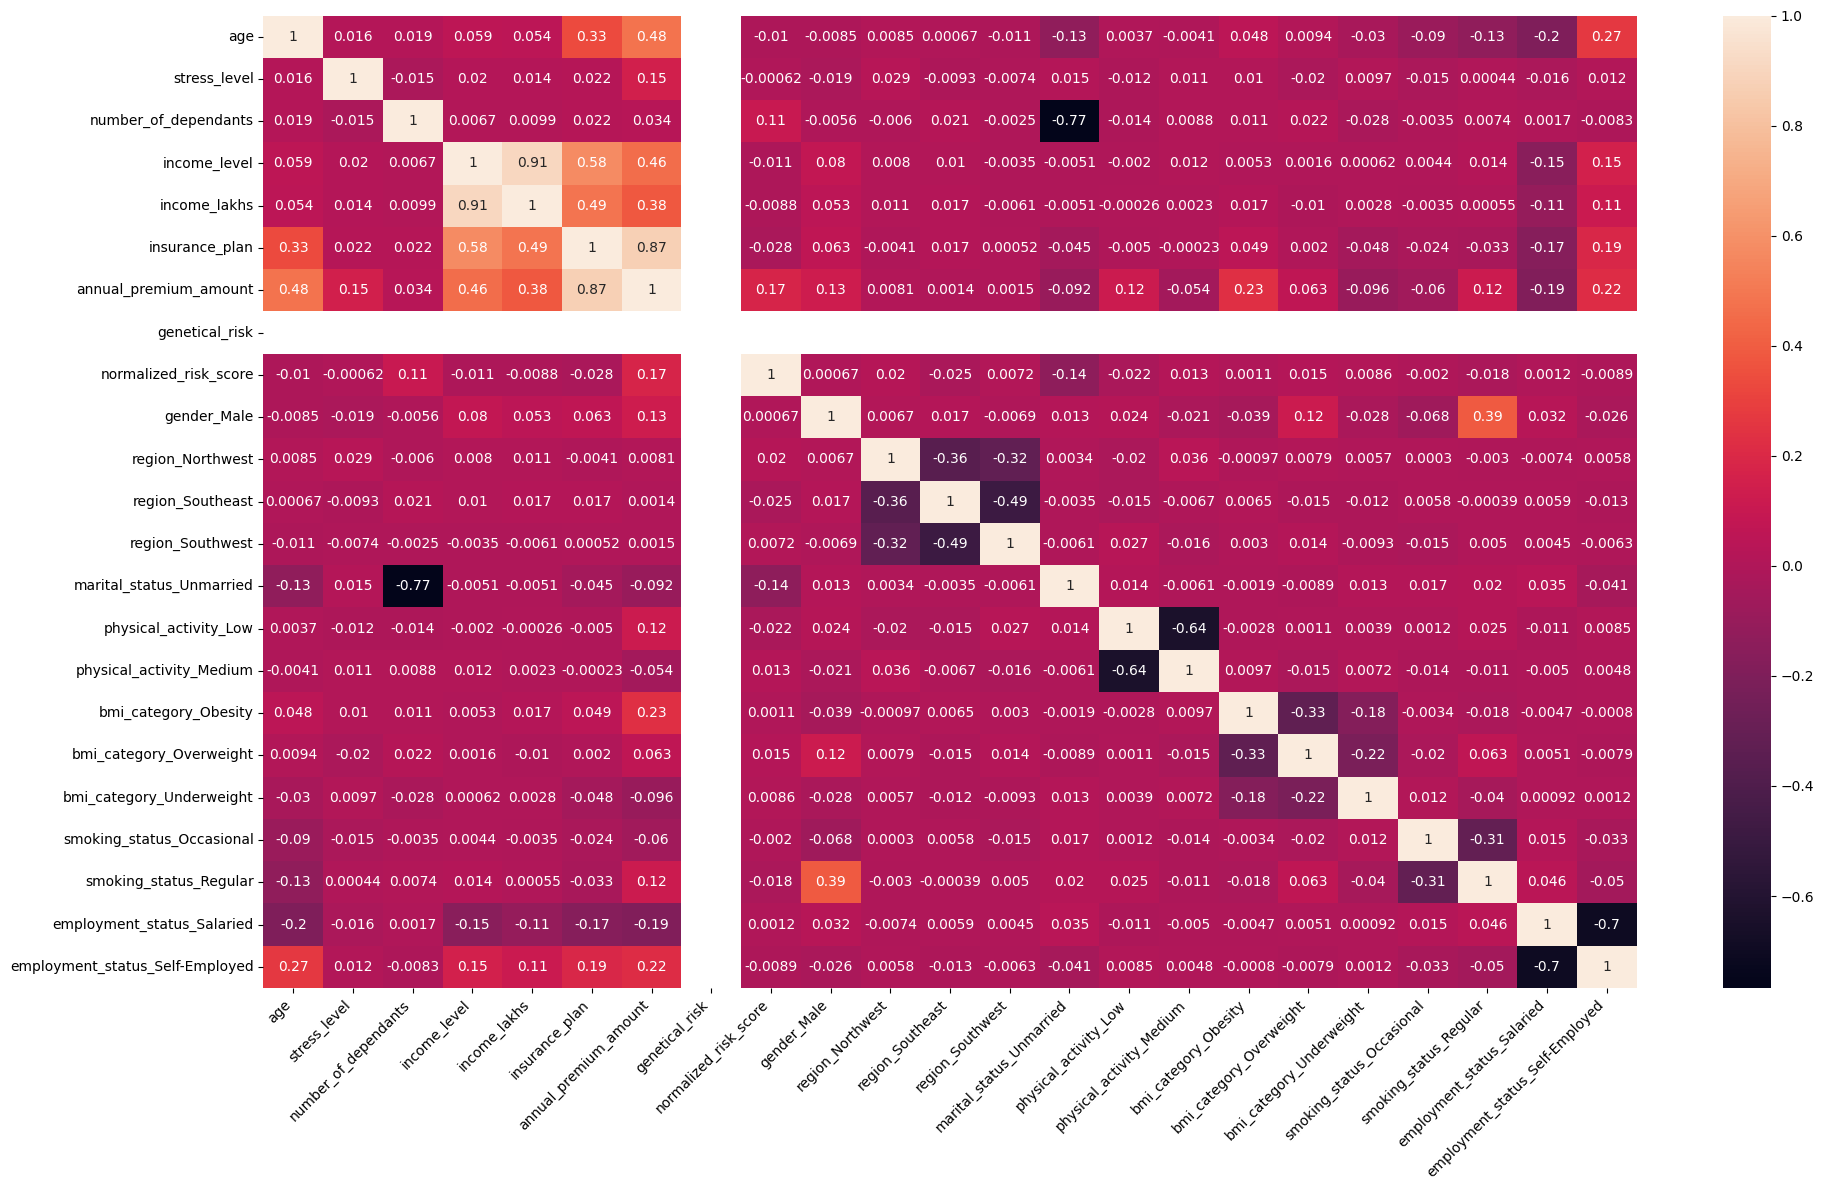

In [54]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
X  = df4.drop('annual_premium_amount', axis='columns')
y = df4.annual_premium_amount

In [56]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan', 'stress_level', 'Genetical_Risk']

# Check if all columns exist in the DataFrame
missing_cols = [col for col in cols_to_scale if col not in X.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
    # Remove missing columns from the scaling list
    cols_to_scale = [col for col in cols_to_scale if col in X.columns]

# Apply MinMaxScaler to existing columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# Display the updated DataFrame statistics
X.describe()


Missing columns: ['Genetical_Risk']


age  stress_level  number_of_dependants  income_level  \
count  6997.000000   6997.000000           6997.000000   6997.000000   
mean      0.403890      0.550021              0.486437      0.358582   
std       0.235896      0.350507              0.283278      0.351512   
min       0.000000      0.000000              0.000000      0.000000   
25%       0.195652      0.500000              0.400000      0.000000   
50%       0.413043      0.500000              0.600000      0.333333   
75%       0.586957      1.000000              0.600000      0.666667   
max       1.000000      1.000000              1.000000      1.000000   

       income_lakhs  insurance_plan  genetical_risk  normalized_risk_score  \
count   6997.000000     6997.000000          6997.0            6997.000000   
mean       0.218131        0.554452             0.0               0.424907   
std        0.225691        0.379441             0.0               0.235733   
min        0.000000        0.000000             0.0               0.000000   
25%        0.050505        0.500000             0.0               0.357143   
50%        0.151515        0.500000             0.0               0.428571   
75%        0.303030        1.000000             0.0               0.428571   
max        1.000000        1.000000             0.0               1.000000   

       gender_Male  region_Northwest  ...  marital_status_Unmarried  \
count  6997.000000       6997.000000  ...               6997.000000   
mean      0.402887          0.193654  ...                  0.243533   
std       0.490513          0.395189  ...                  0.429245   
min       0.000000          0.000000  ...                  0.000000   
25%       0.000000          0.000000  ...                  0.000000   
50%       0.000000          0.000000  ...                  0.000000   
75%       1.000000          0.000000  ...                  0.000000   
max       1.000000          1.000000  ...                  1.000000   

       physical_activity_Low  physical_activity_Medium  bmi_category_Obesity  \
count            6997.000000               6997.000000           6997.000000   
mean                0.255252                  0.544090              0.209661   
std                 0.436034                  0.498088              0.407096   
min                 0.000000                  0.000000              0.000000   
25%                 0.000000                  0.000000              0.000000   
50%                 0.000000                  1.000000              0.000000   
75%                 1.000000                  1.000000              0.000000   
max                 1.000000                  1.000000              1.000000   

       bmi_category_Overweight  bmi_category_Underweight  \
count              6997.000000               6997.000000   
mean                  0.286408                  0.104902   
std                   0.452115                  0.306449   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   1.000000                  0.000000   
max                   1.000000                  1.000000   

       smoking_status_Occasional  smoking_status_Regular  \
count                6997.000000             6997.000000   
mean                    0.178362                0.312848   
std                     0.382845                0.463686   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                0.000000   
75%                     0.000000                1.000000   
max                     1.000000                1.000000   

       employment_status_Salaried  employment_status_Self-Employed  
count                 6997.000000                      6997.000000  
mean                     0.449621                         0.374303  
std          

In [57]:
X.describe()

age  stress_level  number_of_dependants  income_level  \
count  6997.000000   6997.000000           6997.000000   6997.000000   
mean      0.403890      0.550021              0.486437      0.358582   
std       0.235896      0.350507              0.283278      0.351512   
min       0.000000      0.000000              0.000000      0.000000   
25%       0.195652      0.500000              0.400000      0.000000   
50%       0.413043      0.500000              0.600000      0.333333   
75%       0.586957      1.000000              0.600000      0.666667   
max       1.000000      1.000000              1.000000      1.000000   

       income_lakhs  insurance_plan  genetical_risk  normalized_risk_score  \
count   6997.000000     6997.000000          6997.0            6997.000000   
mean       0.218131        0.554452             0.0               0.424907   
std        0.225691        0.379441             0.0               0.235733   
min        0.000000        0.000000             0.0               0.000000   
25%        0.050505        0.500000             0.0               0.357143   
50%        0.151515        0.500000             0.0               0.428571   
75%        0.303030        1.000000             0.0               0.428571   
max        1.000000        1.000000             0.0               1.000000   

       gender_Male  region_Northwest  ...  marital_status_Unmarried  \
count  6997.000000       6997.000000  ...               6997.000000   
mean      0.402887          0.193654  ...                  0.243533   
std       0.490513          0.395189  ...                  0.429245   
min       0.000000          0.000000  ...                  0.000000   
25%       0.000000          0.000000  ...                  0.000000   
50%       0.000000          0.000000  ...                  0.000000   
75%       1.000000          0.000000  ...                  0.000000   
max       1.000000          1.000000  ...                  1.000000   

       physical_activity_Low  physical_activity_Medium  bmi_category_Obesity  \
count            6997.000000               6997.000000           6997.000000   
mean                0.255252                  0.544090              0.209661   
std                 0.436034                  0.498088              0.407096   
min                 0.000000                  0.000000              0.000000   
25%                 0.000000                  0.000000              0.000000   
50%                 0.000000                  1.000000              0.000000   
75%                 1.000000                  1.000000              0.000000   
max                 1.000000                  1.000000              1.000000   

       bmi_category_Overweight  bmi_category_Underweight  \
count              6997.000000               6997.000000   
mean                  0.286408                  0.104902   
std                   0.452115                  0.306449   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   1.000000                  0.000000   
max                   1.000000                  1.000000   

       smoking_status_Occasional  smoking_status_Regular  \
count                6997.000000             6997.000000   
mean                    0.178362                0.312848   
std                     0.382845                0.463686   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                0.000000   
75%                     0.000000                1.000000   
max                     1.000000                1.000000   

       employment_status_Salaried  employment_status_Self-Employed  
count                 6997.000000                      6997.000000  
mean                     0.449621                         0.374303  
std          

In [58]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    # Create a DataFrame to store VIF results
    vif_df = pd.DataFrame()
    
    # Add column names to the DataFrame
    vif_df['Column'] = data.columns
    
    # Calculate VIF for each column and store in the DataFrame
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    
    return vif_df

# Example usage with your data
# Assuming X is your DataFrame with numerical features
vif_results = calculate_vif(X)
vif_results


C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning:

invalid value encountered in scalar divide



Column        VIF
0                               age   4.648967
1                      stress_level   3.279139
2              number_of_dependants   6.911564
3                      income_level  13.841975
4                      income_lakhs  11.221037
5                    insurance_plan   5.474200
6                    genetical_risk        NaN
7             normalized_risk_score   3.933276
8                       gender_Male   2.032710
9                  region_Northwest   2.135326
10                 region_Southeast   3.039969
11                 region_Southwest   2.750045
12         marital_status_Unmarried   2.452836
13            physical_activity_Low   2.121149
14         physical_activity_Medium   3.403833
15             bmi_category_Obesity   1.515653
16          bmi_category_Overweight   1.714785
17         bmi_category_Underweight   1.247496
18        smoking_status_Occasional   1.352489
19           smoking_status_Regular   1.933822
20       employment_status_Salaried   3.180834
21  employment_status_Self-Employed   3.009881

In [59]:
calculate_vif(X.drop('income_level', axis ="columns"))

C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning:

invalid value encountered in scalar divide



Column       VIF
0                               age  4.569329
1                      stress_level  3.278180
2              number_of_dependants  6.911552
3                      income_lakhs  2.579436
4                    insurance_plan  4.692855
5                    genetical_risk       NaN
6             normalized_risk_score  3.932931
7                       gender_Male  2.026918
8                  region_Northwest  2.135049
9                  region_Southeast  3.038970
10                 region_Southwest  2.749838
11         marital_status_Unmarried  2.452790
12            physical_activity_Low  2.120287
13         physical_activity_Medium  3.399290
14             bmi_category_Obesity  1.514629
15          bmi_category_Overweight  1.714470
16         bmi_category_Underweight  1.247217
17        smoking_status_Occasional  1.350917
18           smoking_status_Regular  1.932623
19       employment_status_Salaried  3.168242
20  employment_status_Self-Employed  3.004975

In [60]:
X_reduced = X.drop('income_level', axis ="columns")
X_reduced.head()

age  stress_level  number_of_dependants  income_lakhs  insurance_plan  \
0  0.652174           0.5                   0.4      0.363636             1.0   
1  0.260870           1.0                   1.0      0.090909             0.5   
2  0.630435           0.5                   0.6      0.080808             0.5   
3  0.152174           1.0                   0.0      0.000000             1.0   
4  0.586957           0.5                   0.0      0.050505             0.5   

   genetical_risk  normalized_risk_score  gender_Male  region_Northwest  \
0               0               0.428571            0                 0   
1               0               0.000000            0                 0   
2               0               0.357143            1                 0   
3               0               0.000000            0                 1   
4               0               0.000000            0                 1   

   region_Southeast  ...  marital_status_Unmarried  physical_activity_Low  \
0                 1  ...                         1                      0   
1                 0  ...                         0                      1   
2                 0  ...                         0                      0   
3                 0  ...                         1                      1   
4                 0  ...                         1                      0   

   physical_activity_Medium  bmi_category_Obesity  bmi_category_Overweight  \
0                         1                     0                        0   
1                         0                     0                        1   
2                         0                     0                        1   
3                         0                     0                        0   
4                         1                     0                        1   

   bmi_category_Underweight  smoking_status_Occasional  \
0                         0                          0   
1                         0                          1   
2                         0                          1   
3                         0                          0   
4                         0                          0   

   smoking_status_Regular  employment_status_Salaried  \
0                       0                           0   
1                       0                           0   
2                       0                           1   
3                       1                           0   
4                       0                           0   

   employment_status_Self-Employed  
0                                1  
1                                0  
2                                0  
3                                0  
4                                1  

[5 rows x 21 columns]

# Model Training

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4897, 21), (2100, 21), (4897,), (2100,))

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
test_score.round(2)

0.95

In [64]:
train_score = model_lr.score(X_train, y_train)
train_score.round(2)

0.95

In [65]:
model_lr.coef_

array([ 6622.15926889,  2526.96561286, -1060.77054748,  -910.00089992,
       15027.58932277,     0.        ,  6070.84018862,    32.38308525,
         -61.58577144,   -56.56218806,  -114.36715696,  -642.95341257,
        2370.71275028,   549.56031115,  3912.60595767,  1978.43011503,
         461.49693662,   818.74889558,  2816.90118174,   -57.82562375,
         255.99153759])

In [66]:
model_lr.intercept_

6157.128249679459

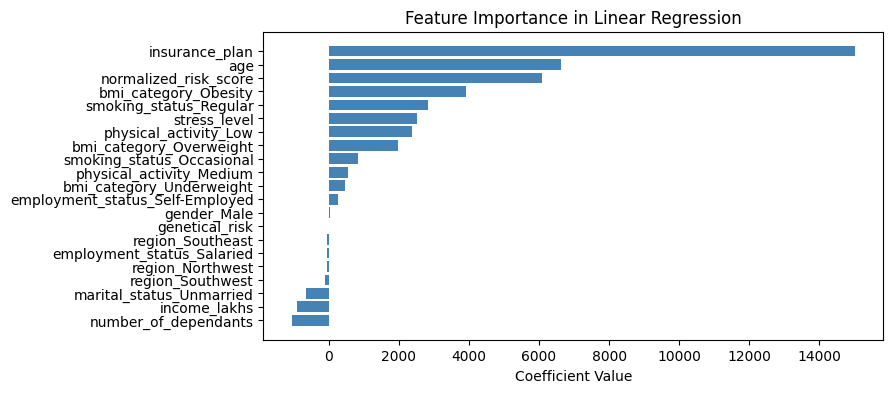

In [67]:
feature_importances = model_lr.coef_

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame(feature_importances, index=X_train.columns, columns=['Coefficients'])

# Sort the DataFrame by coefficients in ascending order
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()


In [68]:
from sklearn.linear_model import Ridge
model_rg = Ridge()
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
test_score.round(2), train_score.round(2)

(0.95, 0.95)

In [69]:
from xgboost import XGBRegressor

In [70]:
# Create the XGBoost Regressor model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
train_score = xgb_model.score(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model - Training Score:", train_score.round(2))
print("XGBoost Model - Testing Score:", test_score.round(2))
print("Mean Squared Error:", mse.round(2))
print("R-squared:", r2.round(2))

XGBoost Model - Training Score: 1.0
XGBoost Model - Testing Score: 0.99
Mean Squared Error: 505203.49
R-squared: 0.99


In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
model_xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model_xgb, param_distributions=param_grid, n_iter=10, cv=3, scoring='r2', random_state=42)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Get the best score
best_score = random_search.best_score_

print("Best R-squared Score from Randomized Search:", best_score.round(2))

Best R-squared Score from Randomized Search: 0.99


In [73]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [74]:
best_model = random_search.best_estimator_

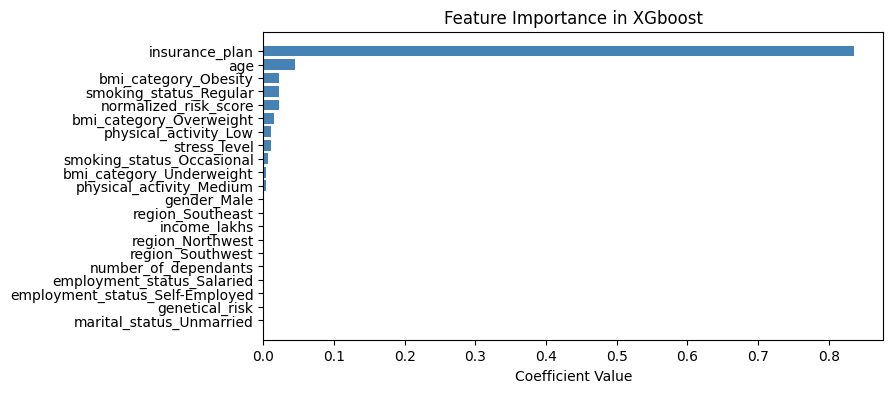

In [75]:
feature_importances = best_model.feature_importances_

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame(feature_importances, index=X_train.columns, columns=['Coefficients'])

# Sort the DataFrame by coefficients in ascending order
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGboost')
plt.show()

# ERROR Analysis

In [76]:
y_pred = best_model.predict(X_test)

residuals = y_pred-y_test
residuals_pct = residuals*100/y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})
results_df.head()

actual     predicted         diff   diff_pct
3730   15616  16592.744141   976.744141   6.254765
1500   30685  30919.792969   234.792969   0.765172
793    24571  24334.802734  -236.197266  -0.961285
881    32863  31830.826172 -1032.173828  -3.140839
6336   14391  16079.454102  1688.454102  11.732709

<Axes: xlabel='diff_pct', ylabel='Count'>

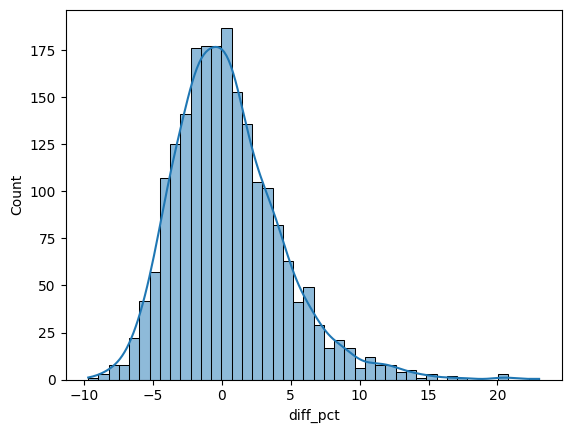

In [77]:
sns.histplot(x=results_df['diff_pct'], kde=True)

In [78]:
import numpy as np

# Set the extreme error threshold
extreme_error_threshold = 10

# Filter rows where the percentage difference is greater than the threshold
extreme_results_df = results_df[np.abs(results_df.diff_pct) > extreme_error_threshold]

# Check the shape of extreme results (number of rows and columns)
extreme_results_count = extreme_results_df.shape[0]

# Calculate the percentage of extreme errors compared to total predictions
extreme_errors_pct = extreme_results_count * 100 / results_df.shape[0]
print(f"Percentage of predictions with extreme errors (>10%): {extreme_errors_pct:.2f}%")

# Filter and display rows where the percentage difference is greater than 50%
extreme_high_errors = results_df[np.abs(results_df.diff_pct) > 10]
print("Rows where percentage error is greater than 30%:")
extreme_high_errors

Percentage of predictions with extreme errors (>10%): 2.33%
Rows where percentage error is greater than 30%:


actual     predicted         diff   diff_pct
6336   14391  16079.454102  1688.454102  11.732709
3416   11935  13242.106445  1307.106445  10.951876
618    10188  11715.967773  1527.967773  14.997721
5692   14038  15701.959961  1663.959961  11.853255
1987   10250  11755.449219  1505.449219  14.687309
4745   11904  13169.379883  1265.379883  10.629871
3140   12001  13421.365234  1420.365234  11.835391
3230   18368  20501.441406  2133.441406  11.614990
574    11954  13242.106445  1288.106445  10.775527
325    10914  12090.058594  1176.058594  10.775688
2399   11233  12694.986328  1461.986328  13.015101
6162   10038  11158.904297  1120.904297  11.166610
5491    9783  10937.940430  1154.940430  11.805586
58      8795  10615.374023  1820.374023  20.697829
2312    9499  10673.167969  1174.167969  12.360964
1188    9150  11023.107422  1873.107422  20.471119
938    12699  14205.128906  1506.128906  11.860217
1694    9831  11005.626953  1174.626953  11.948194
214     9501  10823.196289  1322.196289  13.916391
5458   11822  13301.805664  1479.805664  12.517388
1777   15357  17135.585938  1778.585938  11.581598
1985   10959  12459.282227  1500.282227  13.689956
629     9496  10673.167969  1177.167969  12.396461
2115   10090  11493.513672  1403.513672  13.909947
6487    9396  10937.940430  1541.940430  16.410605
5821   11991  13794.882812  1803.882812  15.043640
5889   14238  16202.495117  1964.495117  13.797550
5835   16247  17946.712891  1699.712891  10.461703
2235   12454  13764.106445  1310.106445  10.519564
1126   11774  13071.943359  1297.943359  11.023810
2019    9442  10876.656250  1434.656250  15.194411
3146   13698  15348.179688  1650.179688  12.046866
5131    8313   9725.326172  1412.326172  16.989368
5817   12234  13554.294922  1320.294922  10.792013
4460    8676  10673.167969  1997.167969  23.019456
2449   11675  13242.106445  1567.106445  13.422753
3500   11170  13447.423828  2277.423828  20.388754
3544    9903  11158.904297  1255.904297  12.682059
3274   10839  12022.038086  1183.038086  10.914642
5519    9799  10876.656250  1077.656250  10.997615
2778   10157  11493.513672  1336.513672  13.158548
1770    9755  11486.138672  1731.138672  17.746168
2809    9662  10937.940430  1275.940430  13.205759
5120   13914  15651.261719  1737.261719  12.485710
1818   12809  14205.128906  1396.128906  10.899593
1339   16291  17946.712891  1655.712891  10.163359
6376   10351  11493.513672  1142.513672  11.037713
1911   10247  11493.513672  1246.513672  12.164669
4821    9635  10823.196289  1188.196289  12.332084

In [79]:
extreme_results_df.index

Index([6336, 3416,  618, 5692, 1987, 4745, 3140, 3230,  574,  325, 2399, 6162,
       5491,   58, 2312, 1188,  938, 1694,  214, 5458, 1777, 1985,  629, 2115,
       6487, 5821, 5889, 5835, 2235, 1126, 2019, 3146, 5131, 5817, 4460, 2449,
       3500, 3544, 3274, 5519, 2778, 1770, 2809, 5120, 1818, 1339, 6376, 1911,
       4821],
      dtype='int64')

In [80]:
X_test.index

Index([3730, 1500,  793,  881, 6336, 2336, 6563, 6894, 6806, 2624,
       ...
       6879, 5259, 4504, 5266, 3555, 4496, 6919, 3684, 2350, 2711],
      dtype='int64', length=2100)

In [81]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df.head()

age  stress_level  number_of_dependants  income_lakhs  \
6336  0.391304           0.0                   0.2      0.000000   
3416  0.260870           1.0                   0.0      0.060606   
618   0.173913           0.0                   1.0      0.010101   
5692  0.195652           0.0                   0.2      0.131313   
1987  0.347826           0.5                   0.6      0.080808   

      insurance_plan  genetical_risk  normalized_risk_score  gender_Male  \
6336             0.5               0               0.000000            1   
3416             0.0               0               0.428571            0   
618              0.0               0               0.357143            0   
5692             0.5               0               0.000000            1   
1987             0.0               0               0.428571            1   

      region_Northwest  region_Southeast  ...  marital_status_Unmarried  \
6336                 0                 0  ...                         1   
3416                 0                 0  ...                         1   
618                  1                 0  ...                         0   
5692                 1                 0  ...                         1   
1987                 1                 0  ...                         0   

      physical_activity_Low  physical_activity_Medium  bmi_category_Obesity  \
6336                      0                         0                     0   
3416                      0                         1                     0   
618                       0                         1                     0   
5692                      0                         1                     0   
1987                      0                         0                     0   

      bmi_category_Overweight  bmi_category_Underweight  \
6336                        0                         0   
3416                        0                         0   
618                         0                         0   
5692                        0                         0   
1987                        0                         0   

      smoking_status_Occasional  smoking_status_Regular  \
6336                          1                       0   
3416                          0                       0   
618                           1                       0   
5692                          0                       0   
1987                          1                       0   

      employment_status_Salaried  employment_status_Self-Employed  
6336                           1                                0  
3416                           1                                0  
618                            1                                0  
5692                           1                                0  
1987                           1                                0  

[5 rows x 21 columns]

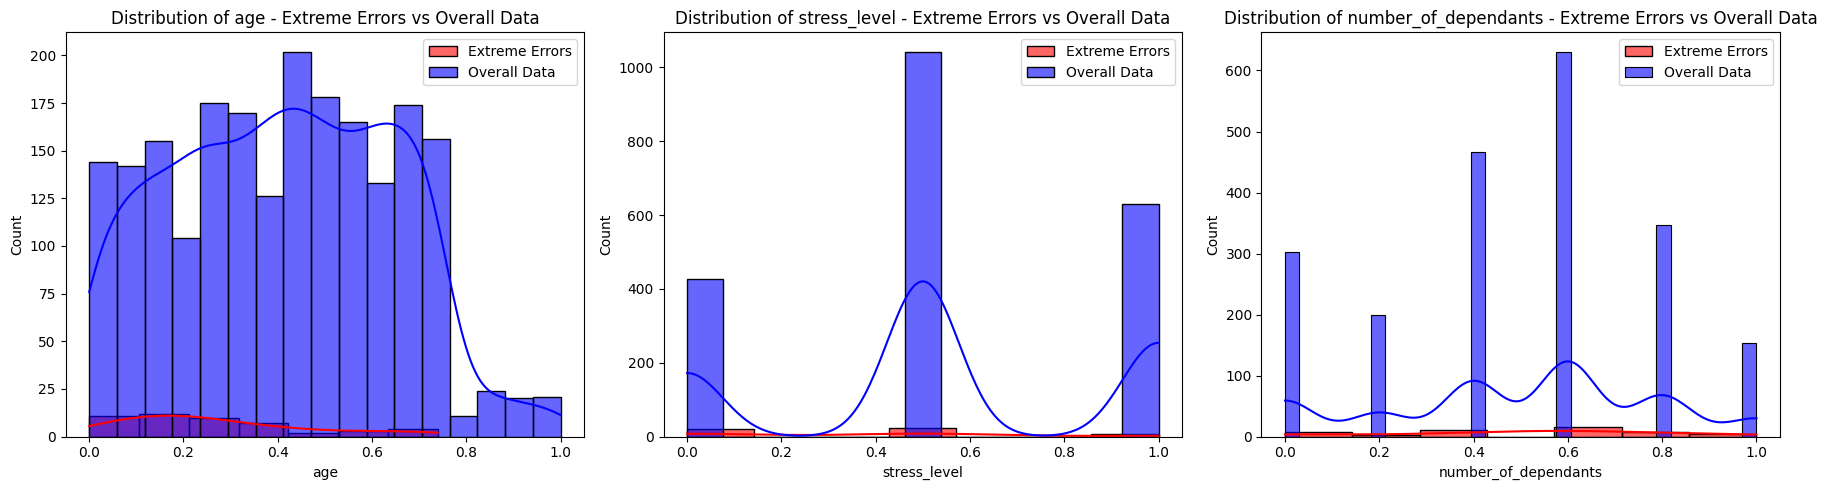

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through the first three features and plot them on the axes
for i, feature in enumerate(X_test.columns[:3]):  # Limit to first 3 features
    sns.histplot(extreme_error_df[feature], label="Extreme Errors", kde=True, color='red', alpha=0.6, ax=axes[i])
    sns.histplot(X_test[feature], label="Overall Data", kde=True, color='blue', alpha=0.6, ax=axes[i])
    
    # Add legend and title
    axes[i].legend()
    axes[i].set_title(f'Distribution of {feature} - Extreme Errors vs Overall Data')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

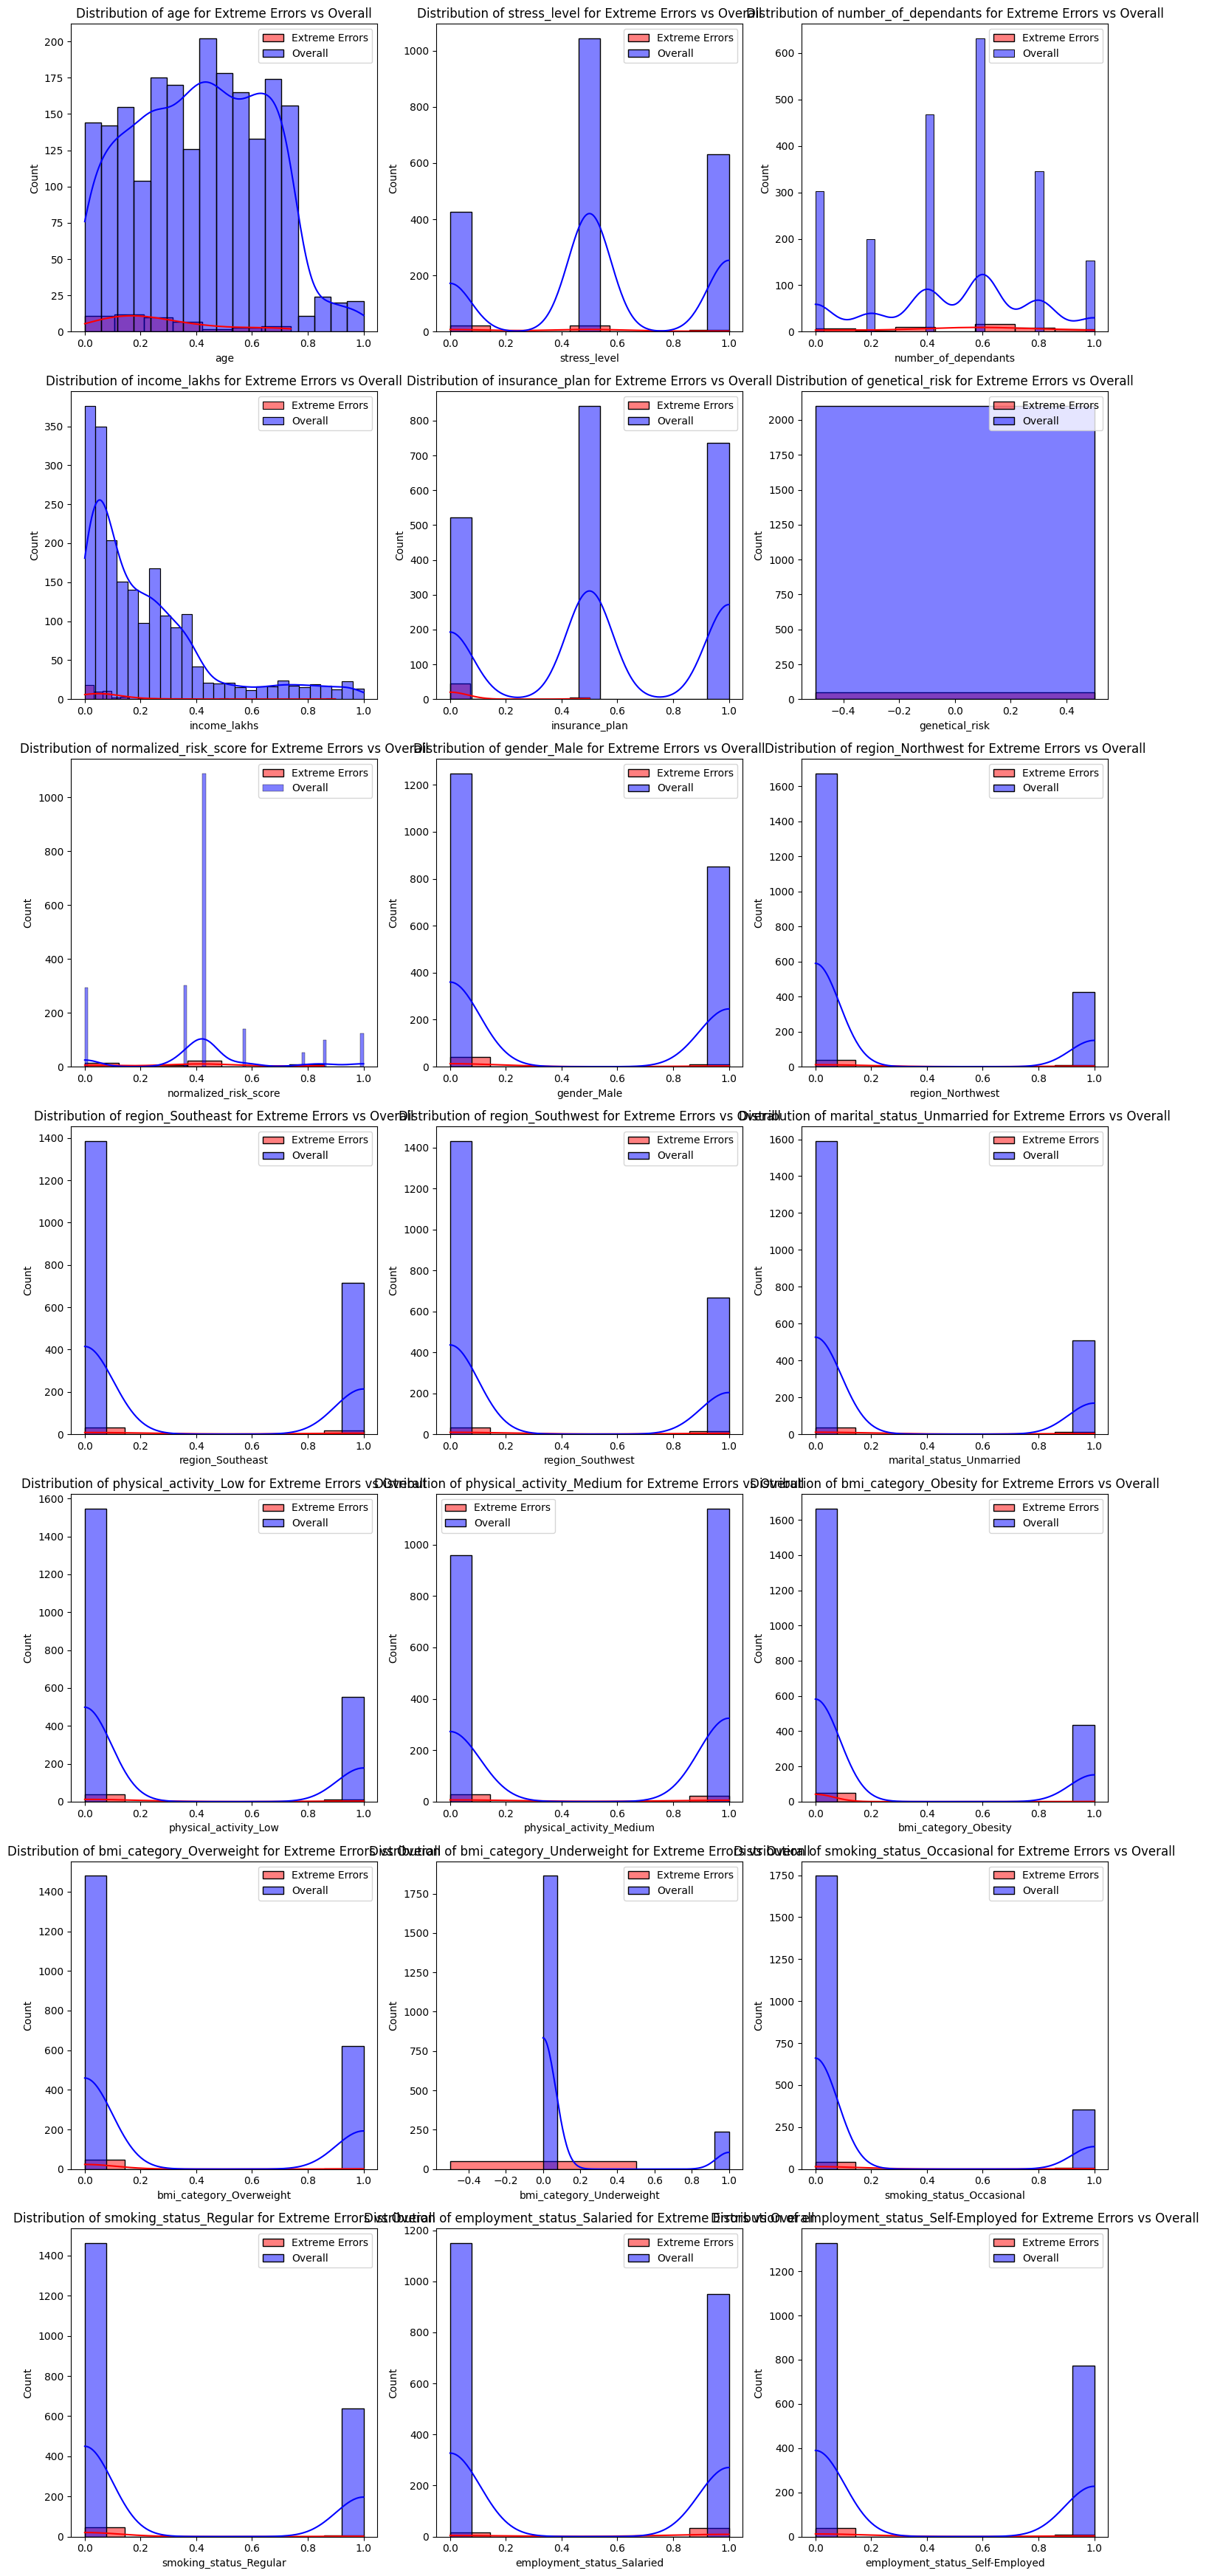

In [83]:
num_features = len(X_test.columns)
num_rows = (num_features + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, feature in enumerate(X_test.columns):
    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True, ax=axes[i])
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True, ax=axes[i])
    axes[i].legend()
    axes[i].set_title(f'Distribution of {feature} for Extreme Errors vs Overall')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [86]:
import joblib

# Save the best_model in the current directory
joblib.dump(best_model, 'best_model_rest.pkl')


['best_model_rest.pkl']

In [85]:
# import os

# # Delete the best_model.pkl file
# if os.path.exists('best_model.pkl'):
#     os.remove('best_model.pkl')
#     print("File deleted successfully.")
# else:
#     print("File does not exist.")
